# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [147]:
# import necessary libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests as rt 
from timeit import default_timer as timer

import json

In [148]:
# Loading the twitter archive enhanced dataset
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [149]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# create image file folder
img_folder = 'image_folder'
if not os.path.exists(img_folder):
    os.makedirs(img_folder)
    
response = rt.get(url) 

In [150]:
# open file and reading it
with open(os.path.join(img_folder, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [151]:
# loading the image file
img_predictions = pd.read_csv('image_folder/image-predictions.tsv', sep= "\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
- twitter developer account registration hiccupps. opted to use the tweet-json.txt file

In [152]:
# loading the tweet-json.txt file
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})


In [153]:
cols = ['id_str', 'retweet_count', 'favorite_count']
tweets_cnt = pd.DataFrame(df_list, columns = cols)
tweets_cnt.head(3)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### tweets count

In [154]:
tweets_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [155]:
tweets_cnt.head(20)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [156]:
tweets_cnt

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [157]:
tweets_cnt.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


#### image predictions dataset

In [158]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [159]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [160]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [161]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [162]:
twitter_archive_df['name'].value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [163]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [164]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [165]:
doggo = twitter_archive_df['doggo'].value_counts()
doggo

None     2259
doggo      97
Name: doggo, dtype: int64

In [166]:
floofer = twitter_archive_df['floofer'].value_counts()
floofer

None       2346
floofer      10
Name: floofer, dtype: int64

In [167]:
pupper = twitter_archive_df['pupper'].value_counts()
floofer

None       2346
floofer      10
Name: floofer, dtype: int64

In [168]:
puppo = twitter_archive_df['puppo'].value_counts()
puppo

None     2326
puppo      30
Name: puppo, dtype: int64

In [169]:
twitter_archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
440,819924195358416896,NaN,NaN,2017-01-13 15:08:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819924195...,11,10,None,doggo,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None


In [170]:
series_cols = ['rating_numerator', 'rating_denominator']
twitter_archive_rating = twitter_archive_df[series_cols]
twitter_archive_rating

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [171]:
twitter_archive_df.duplicated().sum()

0

In [172]:
img_predictions.duplicated().sum()

0

In [173]:
tweets_cnt.duplicated().sum()

0

### Quality issues
1. some numerators are 0 (twitter_archive_df)

2. tweet_id (twiter_archive_df) is int but should be str

3. change none to null (twitter_archive_df)

4. articles used as name (the, a, an) (twitter_archive_df)

5. timestamp is misrepresented as str (twitter_archive_df)

6. lower and upper case mix in same case for names p in image prediction dataset

7. remove unnnecessary column = 'retweeted_status_id' (twitter_archive_df)

8. rename id_str on tweets_cnt dataset to tweet_id

9. merge twitter_archive_clean with tweets_count datasets

### Tidiness issues
1. image-prediction dataset: rename 'conf' to confidence

2. twitter_archvie_enhanced: consolidate 'doggo, floofer, pupper,puppo into a single column. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [174]:
# Make copies of original pieces of data
tweets_counts_clean = tweets_cnt.copy()
twitter_archive_clean = twitter_archive_df.copy()
img_predictions_clean = img_predictions.copy()

### Issue #1: some numerators in the ratings in twitter_archive_df are less than 10 or zero in some cases.

#### Define: Add 10 to values that are less than 10 in the rating_numerator.

#### Code

In [175]:
# check if less than 10 and add 10 if true
twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator <= 10] = twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator <= 10].add(10)

/tmp/ipykernel_53481/1291568580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator <= 10] = twitter_archive_clean.rating_numerator[twitter_archive_clean.rating_numerator <= 10].add(10)


#### Test

In [176]:
twitter_archive_clean.rating_numerator.value_counts().head(20)

12     567
11     473
20     462
13     370
19     158
18     102
14      71
17      56
15      39
16      32
420      2
10       2
75       2
45       1
60       1
44       1
121      1
143      1
99       1
26       1
Name: rating_numerator, dtype: int64

### Issue #2: 
tweet_id (twiter_archive_df) is int but should be str

#### Define change the datatype fro tweet_id in twitter_archive_clean

#### Code

In [177]:
twitter_archive_clean.tweet_id = twitter_archive_clean['tweet_id'].astype('str')

#### Test

In [178]:
twitter_archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue #3: change none to null (twitter_archive_df)

#### define : replace 'None' with nulls using numpy method

###### code

In [179]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace("None", value = np.nan)

##### Test

In [180]:
twitter_archive_clean.name.isnull().value_counts()

False    1611
True      745
Name: name, dtype: int64

### Issue #4: articles used as name (the, a, an, etc) (twitter_archive_df)

##### define: replace the erronenous names, articles with no_name on name column

#### code

In [181]:
wrong_names = (["a", "all", "an", "the", "this", "very", "by", "his", "just", "not", "such"])

for wn in wrong_names:
    twitter_archive_clean.name.replace(wn, "no_name", inplace = True)

#### test

In [182]:
twitter_archive_clean.name.value_counts()

no_name       86
Charlie       12
Cooper        11
Lucy          11
Oliver        11
              ..
Gert           1
Dex            1
Ace            1
Tayzie         1
Christoper     1
Name: name, Length: 946, dtype: int64

### Issue #5: Timestamp is misrepresented as str (twitter_archive_df)

#### define: change the dtype for timestamp & retweeted_timestamp on twitter_archive_clean

#### code

In [183]:
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.astype('datetime64')
twitter_archive_clean['retweeted_status_timestamp'] = twitter_archive_clean.retweeted_status_timestamp.astype('datetime64')

#### test

In [184]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #6: use same case for names p in image prediction dataset


#### define: change all names to upper case using title method

In [185]:
img_predictions_clean.p1 = img_predictions_clean.p1.str.title()
img_predictions_clean.p2 = img_predictions_clean.p2.str.title()
img_predictions_clean.p3 = img_predictions_clean.p3.str.title() 

#### test

In [186]:
img_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### Issue #7: Remove unnnecessary column = 'retweeted_status_id' (twitter_archive_df)

#### define: Drop unnecessary columns from twitter_archive_clean dataset using drop method

#### code

In [187]:

drp_cols = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'source']
twitter_archive_clean = twitter_archive_clean.drop(columns=drp_cols)

#### test

In [188]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #8: image-prediction dataset: rename 'conf' to confidence

#### define: rename conf to confidence in img_predictions dataset

##### code

In [189]:
img_predictions_clean.rename(columns={'p1_conf': 'p1_confidence',
                                      'p2_conf': 'p2_confidence',
                                      'p3_conf': 'p3_confidence'}, inplace=True)

#### test

In [190]:
img_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confidence', 'p1_dog', 'p2',
       'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog'],
      dtype='object')

### Issue #9: Twitter_archvie_enhanced: consolidate 'doggo, floofer, pupper,puppo into a single column. 

#### define: 
- create new column with dog stage 
- extract dog stage from text put the pets stage 
- drop original columns related to stage

#### code

In [191]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.text.str.extract('(floofer|doggo|pupper|puppo)')
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### test

In [192]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')

In [203]:
twitter_archive_clean.dog_stage.unique()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Issue #10: rename id_str to tweet_id on tweets_cnt

#### define: rename column id_str to tweet_id

#### code

In [194]:
tweets_counts_clean.rename(columns = {'id_str': 'tweet_id'}, inplace=True)

In [195]:
tweets_counts_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #11: change dtype of tweet_id on img_predictions

##### define: change type from int to str

#### code

In [196]:
img_predictions_clean.tweet_id = img_predictions_clean.tweet_id.astype('str')

#### test


In [197]:
img_predictions_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Issue #11: merge twitter_archvie_clean with tweets_cnt  

#### define: merge twitter_archieve_clean dataset with tweets_count_clean & img_prediction_clean using left join on tweet_id

#### code

In [198]:
twitter_archive_clean_1 = pd.merge(twitter_archive_clean, tweets_counts_clean, on = 'tweet_id', how='left')
twitter_archive_cleaned_2 = pd.merge(twitter_archive_clean_1, img_predictions_clean, on = 'tweet_id', how='left')

#### test

In [199]:
twitter_archive_cleaned_2.head(3)

,tweet_id,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


In [200]:
twitter_archive_cleaned_2.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'p1', 'p1_confidence', 'p1_dog', 'p2', 'p2_confidence', 'p2_dog', 'p3',
       'p3_confidence', 'p3_dog'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [201]:
twitter_archive_cleaned_2.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [202]:
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df.head(3)

,tweet_id,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


In [204]:
twitter_df.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'p1', 'p1_confidence', 'p1_dog', 'p2', 'p2_confidence', 'p2_dog', 'p3',
       'p3_confidence', 'p3_dog'],
      dtype='object')

### Insights & Visualizations:
1. The most common dog names (top 20)

2. The most common dog stage

3. Different descriptive stats about the dataset

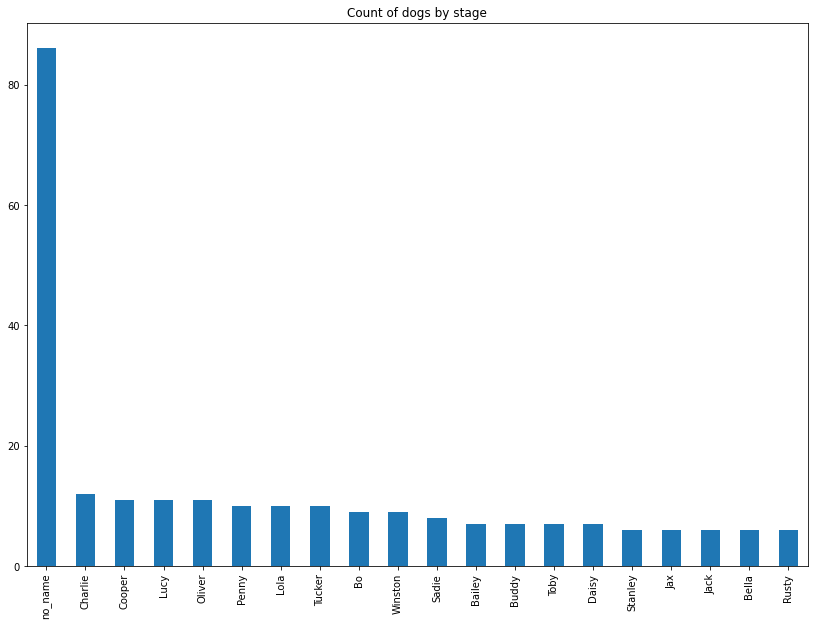

In [221]:
twitter_df.name.value_counts().head(20).plot(
    kind='bar', 
    title="Count of dogs by stage",
    figsize=(14, 10));

#### Insights
1. Most of the dog names were not provided.
2. Charlie is the most common dog name in the data followered by cooper and lucy

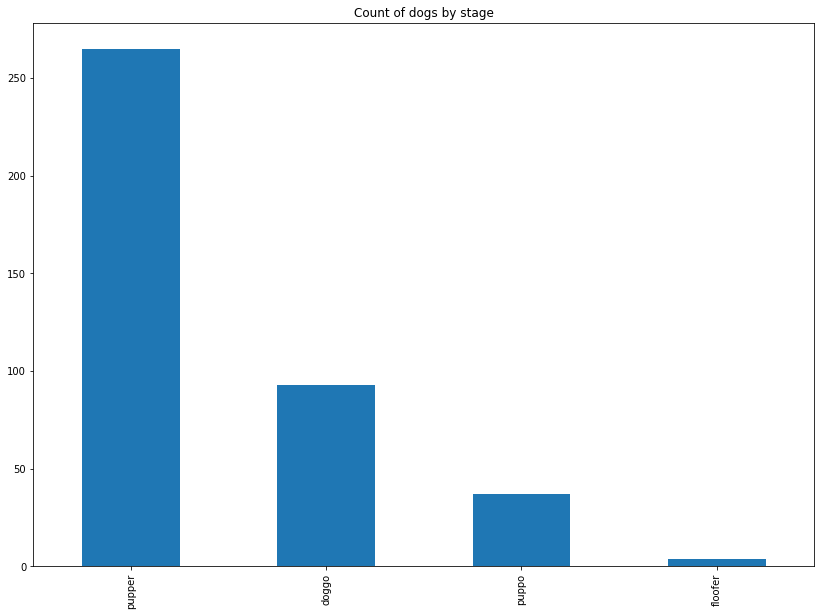

In [218]:
# most common dog stage posted
twitter_df.dog_stage.value_counts().plot(
    kind='bar', 
    title="Count of dogs by stage",
    figsize=(14, 10));

#### Insights:
1. The most posted dogs by stage are Puppers with over 250 pets at that stage.
2. The least posted dog by stage are Floofers with less than 25 posting.

In [222]:
twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_confidence,p2_confidence,p3_confidence
count,2.356000e+03,2356.000000,2356.000000,2354.000000,2354.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,16.950764,10.455433,3164.797366,8080.968564,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,45.757759,6.745237,5284.770364,11814.771334,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,10.000000,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,12.000000,10.000000,624.500000,1415.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,13.000000,10.000000,1473.500000,3603.500000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,19.000000,10.000000,3652.000000,10122.250000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


- The highest rating numerator is 1776 and the lowest is 10 which means all dogs received a rating.
- The highest retweet count (max) is 79515 and the lowest is 0. The average retweet is 1473. this means that majority of the posts were retweeted highly. 
- the most likes on a post were 132810 and the average at 3603 whcih means there is a wide gap/ range between the most liked post and the least liked. 